In [4]:
from dotenv import dotenv_values

config = dotenv_values()
config['MODEL']

'pigs_v1.onnx'

In [ ]:
from detector import YOLOv8
import cv2
from dotenv import load_dotenv
import os

load_dotenv()
MODEL = os.getenv('MODEL')
print(MODEL)

def stream(address):#, camera, event_id):
    """
    Запуск модели
    """
    yolov8_detector = YOLOv8(path=MODEL,
                             conf_thres=0.3,
                             iou_thres=0.5)
    
    cv2.namedWindow('stream', cv2.WINDOW_NORMAL)
    cap = cv2.VideoCapture(address)

    while cap.isOpened():# and end_time is None:
        # Кадр с камеры
        ret, frame = cap.read()
        if not ret:
            break

        # Детектирование
        detected_img = frame.copy()
        bounding_boxes, scores, class_ids = yolov8_detector(detected_img)
        # print(class_ids)
        # bounding_boxes = np.array(bounding_boxes).astype('int')
        # print(bounding_boxes)

        detected_img = yolov8_detector.draw_detections(detected_img)

        if detected_img is None:
            continue


        cv2.imshow('stream', detected_img)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break


    cv2.destroyAllWindows()
    cap.release()

stream('')

In [2]:
from detector import YOLOv8
import cv2
from dotenv import load_dotenv
import os

load_dotenv()
MODEL = os.getenv('MODEL')
yolov8_detector = YOLOv8(path=MODEL,
                        conf_thres=0.3,
                        iou_thres=0.5)
    

cv2.namedWindow('test', cv2.WINDOW_NORMAL)
image = cv2.imread('../test.png')

bounding_boxes, scores, class_ids = yolov8_detector(image)
# print(bounding_boxes)
image = yolov8_detector.draw_detections(image)


cv2.imshow('test', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

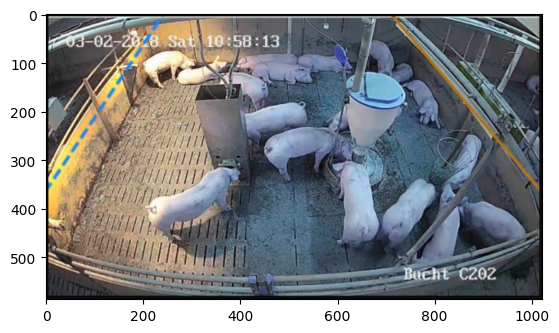

In [4]:
import matplotlib.pyplot as plt

plt.imshow(image)